In [7]:
%matplotlib inline
import six.moves.cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt


In [8]:
def collect_losses(files, type, loss):
    l = []
    for f in files:
        p = pickle.load(open(f, "rb"))
        ls = np.array([s[loss] for s in p[type]])
        l.append(ls)
    return np.concatenate(l)

Total number of train iters: 500
Total number of train iters: 500
Total number of val iters: 0
Total number of val iters: 0
Train Loss (RED) (averaged over 100 iterations)
Validation Loss (BLUE) (averaged over 2 iterations)


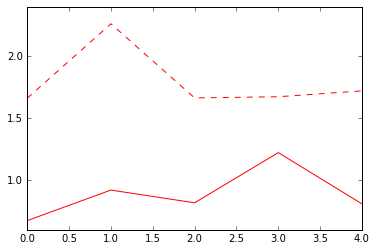

In [15]:

dump_files = [
             #'/data/depth_models/vnet2_nyu_official_tmp_loss.pkl'
             '/media/data/depth_models/vnet2_logloss_raw_tmp_loss.pkl'
            ]
losses = collect_losses(dump_files,"train","loss")
# Epoch-wise mean
N = 100
print "Total number of train iters: %i" % len(losses)
if len(losses) < 2*N:
    print "Warning: Less than two epochs of training."
nn  = np.zeros((len(losses) // N))
for x in range(len(losses) // N):
    nn[x] = losses[x*N:(x+1)*N].mean()
    

    
losses = collect_losses(dump_files,"train","mse")
# Epoch-wise mean
print "Total number of train iters: %i" % len(losses)
if len(losses) < 2*N:
    print "Warning: Less than two epochs of training."
nr  = np.zeros((len(losses) // N))
for x in range(len(losses) // N):
    nr[x] = losses[x*N:(x+1)*N].mean()
    
    
    
    
losses = collect_losses(dump_files,"val", "loss")
# Epoch-wise mean
X = 2
print "Total number of val iters: %i" % len(losses)
if len(losses) < 2*X:
    print "Warning: Less than two epochs of validation."
nl  = np.zeros((len(losses) // X))
for x in range(len(losses) // X):
    nl[x] = losses[x*X:(x+1)*X].mean()
    
    
losses = collect_losses(dump_files,"val", "mse")
# Epoch-wise mean
print "Total number of val iters: %i" % len(losses)
if len(losses) < 2*X:
    print "Warning: Less than two epochs of validation."
nlr  = np.zeros((len(losses) // X))
for x in range(len(losses) // X):
    nlr[x] = losses[x*X:(x+1)*X].mean()
    
    
print "Train Loss (RED) (averaged over %i iterations)" % N
print "Validation Loss (BLUE) (averaged over %i iterations)" % X
x1 = np.arange(len(nn))
x2 = np.arange(len(nl))
plt.plot(x1, nn,'r-',x2, nl, 'b-',x1, nr, 'r--', x2, nlr, 'b--')

